In [44]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Determine whether or not we are using train or test data

In [45]:
train = True

if train:
    path = test_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/test/')
else:
    path = train_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/train/')

Load the data annotations for the data

In [46]:
data = sio.loadmat(os.path.join(path, 'joint_data.mat'))
joint_names = data['joint_names']
joint_uvd = data['joint_uvd']
joint_xyz = data['joint_xyz']

Generate format strings for the different types of images

In [47]:
rgb_format = 'rgb_{k}_{f:07d}.png'

Use format strings along with indices to generate the image file names.

In [121]:
image_index = 1 # range from 1 - 3 max is (np.size(joint_uvd, 0))
kinect_index = 2 # range from 1 - 8252 max is (np.size(joint_uvd, 1))
rgb_string = rgb_format.format(k = image_index, f=kinect_index)

<IPython.core.display.Javascript object>


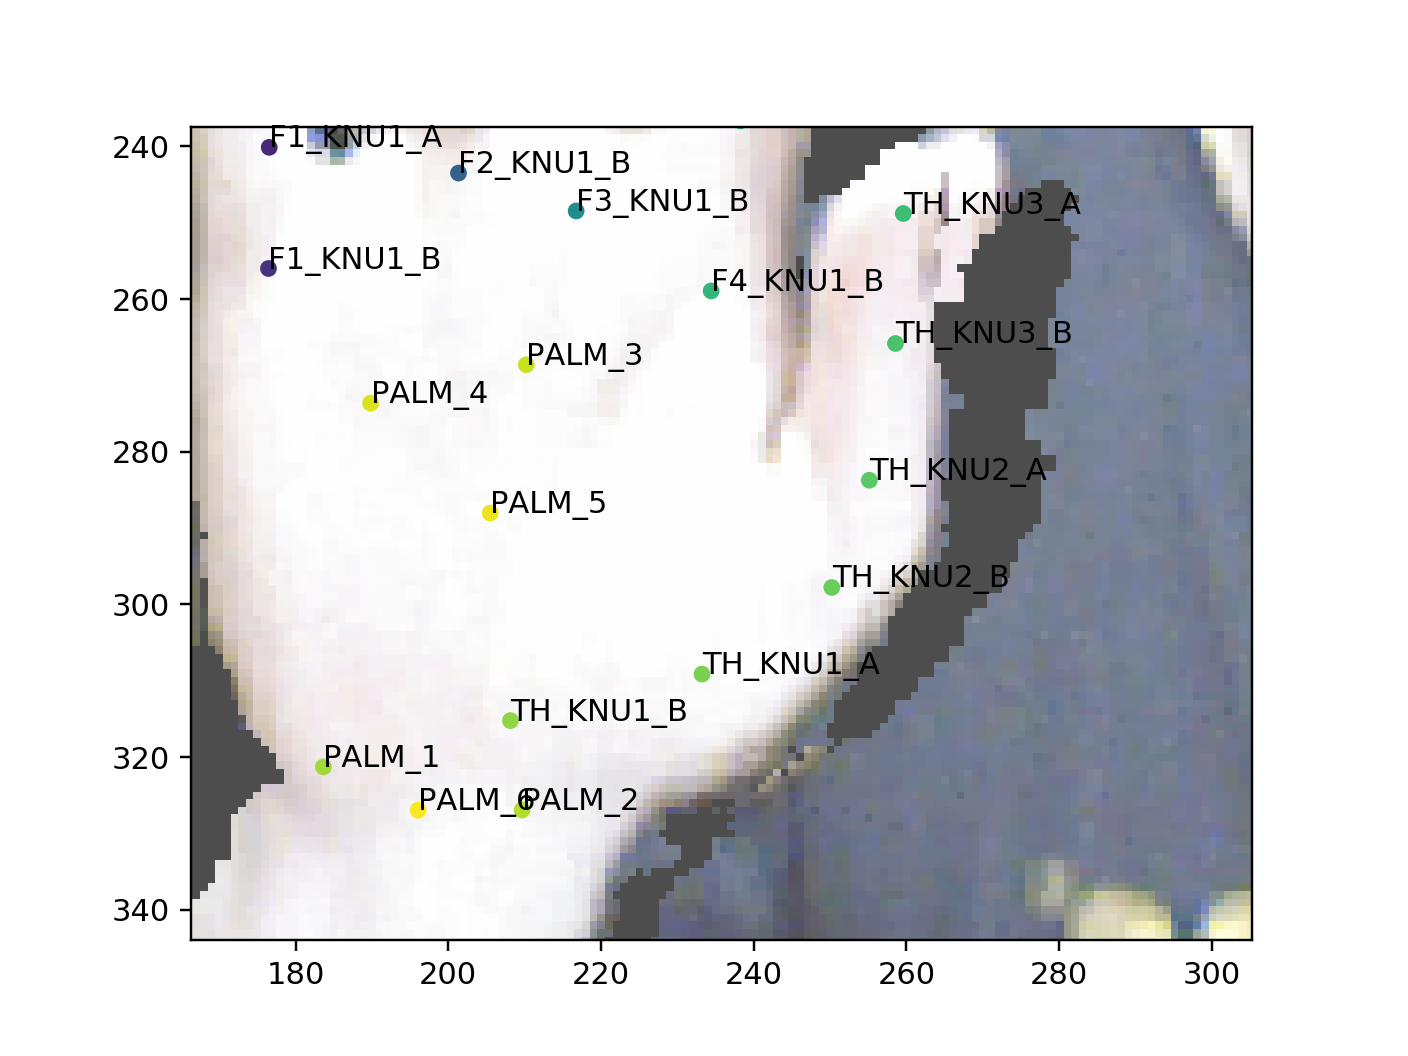

In [122]:
jnt_uvd = np.squeeze(joint_uvd[image_index - 1, kinect_index - 1, :, :]) # joint u, v, depth data
n = np.size(jnt_uvd,0) # number of joints
jnt_scales = 20 *np.ones(n)
jnt_colors = np.arange(n); # random colors

rgb = plt.imread(os.path.join(path, rgb_string))
plt.imshow(rgb, alpha=.7) # display the image
# display the x, y, scale, and color of joints 
plt.scatter(x=jnt_uvd[:, 0], y=jnt_uvd[:, 1], s = jnt_scales, c = jnt_colors)
for ind, jnt in enumerate(jnt_uvd[:, 0:2]):
    plt.annotate(joint_names[0][ind][0], (jnt[0],jnt[1]))
plt.show()

[('F1_KNU3_A', 'F1_KNU3_B'), ('F1_KNU3_B', 'F1_KNU2_A'), ('F1_KNU2_A', 'F1_KNU2_B'), ('F1_KNU2_B', 'F1_KNU1_A'), ('F1_KNU1_A', 'F1_KNU1_B'), ('F2_KNU3_A', 'F2_KNU3_B'), ('F2_KNU3_B', 'F2_KNU2_A'), ('F2_KNU2_A', 'F2_KNU2_B'), ('F2_KNU2_B', 'F2_KNU1_A'), ('F2_KNU1_A', 'F2_KNU1_B'), ('F3_KNU3_A', 'F3_KNU3_B'), ('F3_KNU3_B', 'F3_KNU2_A'), ('F3_KNU2_A', 'F3_KNU2_B'), ('F3_KNU2_B', 'F3_KNU1_A'), ('F3_KNU1_A', 'F3_KNU1_B'), ('F4_KNU3_A', 'F4_KNU3_B'), ('F4_KNU3_B', 'F4_KNU2_A'), ('F4_KNU2_A', 'F4_KNU2_B'), ('F4_KNU2_B', 'F4_KNU1_A'), ('F4_KNU1_A', 'F4_KNU1_B'), ('TH_KNU3_A', 'TH_KNU3_B'), ('TH_KNU3_B', 'TH_KNU2_A'), ('TH_KNU2_A', 'TH_KNU2_B'), ('TH_KNU2_B', 'TH_KNU1_A'), ('TH_KNU1_A', 'TH_KNU1_B'), ('THU_KNU1_B', 'PALM_2'), ('PALM_2', 'PALM_6'), ('PALM_6', 'PALM_1'), ('PALM_6', 'PALM_5'), ('PALM_4', 'PALM_5'), ('PALM_3', 'PALM_5'), ('F1_KNU1_B', 'PALM_4'), ('F2_KNU1_B', 'PALM_4'), ('F3_KNU1_B', 'PALM_3'), ('F4_KNU1_B', 'PALM_3')]


In [39]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


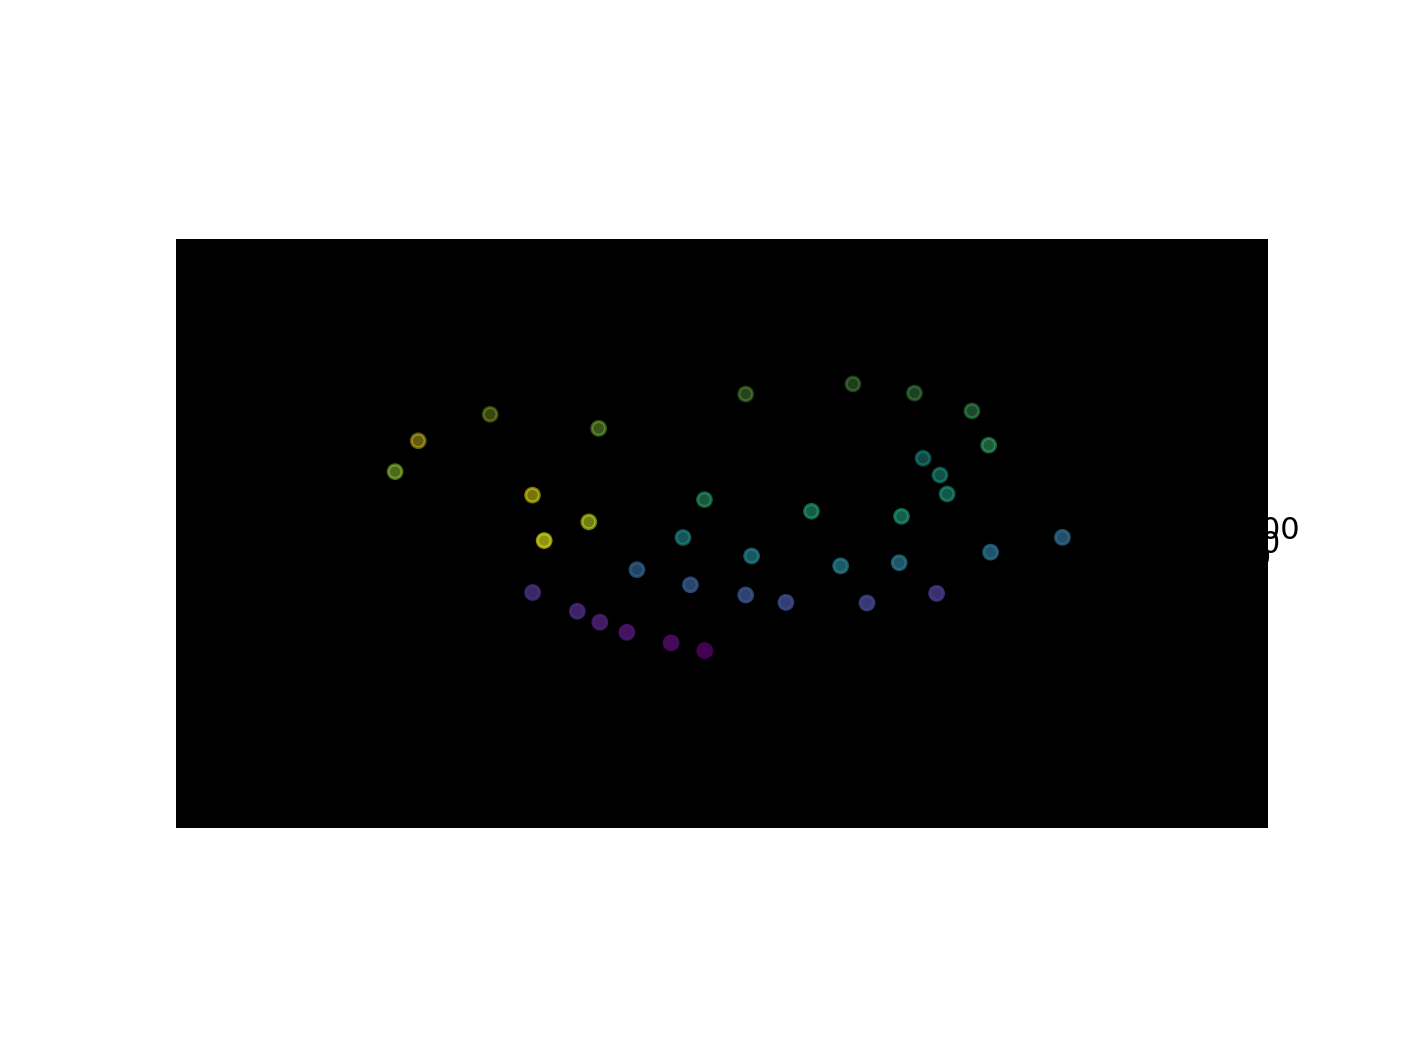

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=jnt_uvd[:, 0], ys=jnt_uvd[:, 1], zs = jnt_uvd[:, 2], s = jnt_scales, c = jnt_colors)

In [92]:
alljoints = ""
for x in joint_names:
    for y in x:
        alljoints = alljoints + "'" + y[0] + "', "
alljoints

"'F1_KNU3_A', 'F1_KNU3_B', 'F1_KNU2_A', 'F1_KNU2_B', 'F1_KNU1_A', 'F1_KNU1_B', 'F2_KNU3_A', 'F2_KNU3_B', 'F2_KNU2_A', 'F2_KNU2_B', 'F2_KNU1_A', 'F2_KNU1_B', 'F3_KNU3_A', 'F3_KNU3_B', 'F3_KNU2_A', 'F3_KNU2_B', 'F3_KNU1_A', 'F3_KNU1_B', 'F4_KNU3_A', 'F4_KNU3_B', 'F4_KNU2_A', 'F4_KNU2_B', 'F4_KNU1_A', 'F4_KNU1_B', 'TH_KNU3_A', 'TH_KNU3_B', 'TH_KNU2_A', 'TH_KNU2_B', 'TH_KNU1_A', 'TH_KNU1_B', 'PALM_1', 'PALM_2', 'PALM_3', 'PALM_4', 'PALM_5', 'PALM_6', "

In [67]:
x = joint_names[0][1][0]
str(x)

'F1_KNU3_B'